In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import os
plt.rcParams.update({'savefig.dpi':100})
plt.rcParams.update({'font.size': 16})

In [42]:
auction, dataset_name = ('NoAuction', 'DecPre')
data=np.load(auction+'_'+dataset_name+'.npy')
idx = np.concatenate([np.concatenate((np.flip(np.arange(i+2,40,4)), np.arange(i,40,4))) for i in range(2)])
data[:,:40]=data[:,:40][:,idx]
print(data.shape)
n_ticks=np.load(auction+'_n_ticks.npy')
break_points=[0]+list(n_ticks.T.flatten().cumsum())
data = np.array([data[break_points[i]:break_points[i+1]] for i in range(len(break_points)-1)]).reshape(5,10).T


(394337, 46)


In [43]:
x = data[0,0][:100,:40].reshape(-1,2,20)
x[:,1]*=10
x[:,1,:10]*=-1
x = np.around(x*1e4,0).astype(int)
x[:,0]-=np.amin(x[:,0])
print(x.shape)
midprice = (x[:,0,9]+x[:,0,10])/2

(100, 2, 20)


In [44]:
a = np.zeros([np.amax(x[:,0])+1,len(x)])
a[x[:,0].flatten(), np.tile(np.arange(len(x)),20).reshape(20,len(x)).T.flatten()]=x[:,1].flatten()
a_initial=a.copy()
b = (np.hstack((a, np.zeros([len(a), 1]))) - np.hstack((np.zeros([len(a), 1]),a)))[:,:-1]
print(np.count_nonzero(b))
c = np.cumsum(a!=0, axis=0)
c = np.logical_or(c==0, c==20)
event_idx = list(zip(np.nonzero(b)[0], np.nonzero(b)[1]))
for i in range(len(event_idx)-1):
    if event_idx[i][0]==event_idx[i+1][0]:
        if a[event_idx[i]]==0 and b[event_idx[i]]==-b[event_idx[i+1]]:
            a[event_idx[i][0], event_idx[i][1]:event_idx[i+1][1]] = \
            c[event_idx[i][0], event_idx[i][1]:event_idx[i+1][1]]*a[event_idx[i+1]]

569


449


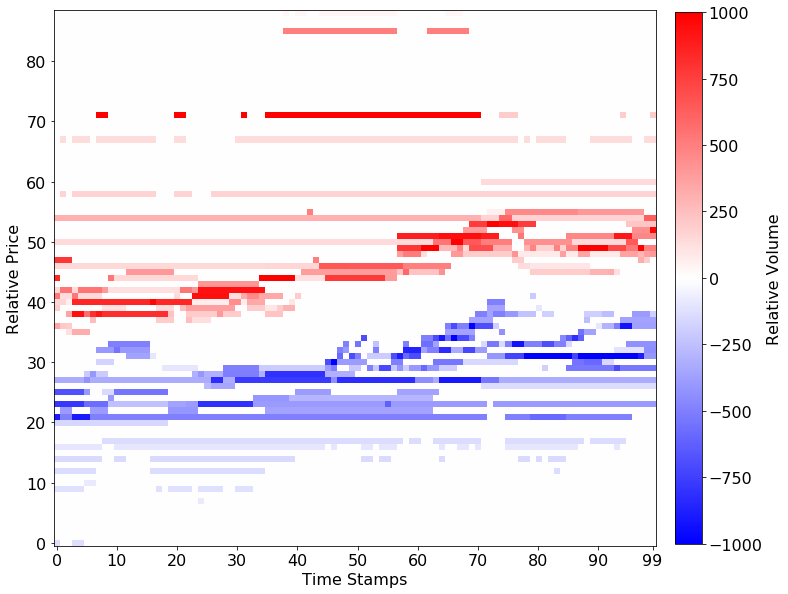

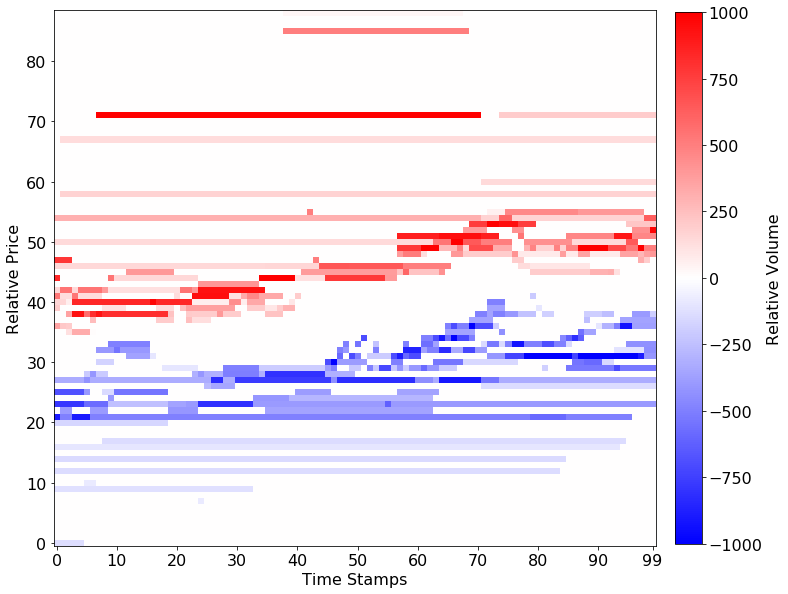

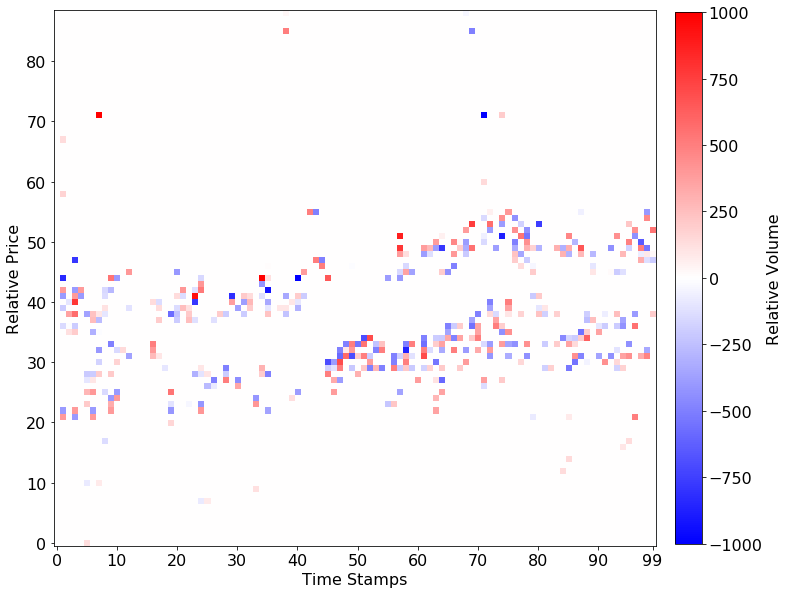

In [45]:
b = a - np.roll(a, 1, axis=1)
b[:,0]=0
print(np.count_nonzero(b))
c = np.cumsum(a>0, axis=0) + np.flipud(np.cumsum(np.flipud(a)<0, axis=0))

for i,name in [(a_initial, 'a_initial'), (a, 'a'), (b, 'b')]:
    f, axes=plt.subplots(1,1, figsize=(12,9))
    f.subplots_adjust(left=0.1, bottom=0.1, right=0.85, top=0.95)
# plt.figure(figsize=(10,10))
    im=plt.imshow(i, cmap='bwr', origin='lower', vmin=-1000, vmax=1000)
    _=plt.ylabel('Relative Price')
    _=plt.xlabel('Time Stamps')
#     _=plt.yticks(np.arange(3,90,10), (np.arange(3,90,10)-x[-1,0,9:11].mean()).astype(int))
    _=plt.xticks(np.concatenate((np.arange(0,100,10),[99])))
    cbar=f.colorbar(im, ax=axes, fraction=0.041, pad=0.03)
    cbar.set_label('Relative Volume', rotation=90)
#     f.savefig('Event_'+name+'.jpg')

In [46]:
d = pd.DataFrame(data=np.array(np.nonzero(b)).T, index=None, columns=['price', 'time'])
d['volume_old'] = a[d['price'], d['time']-1]
d['volume_new'] = a[d['price'], d['time']]
d['level_old']  = c[d['price'], d['time']-1]
d['level_new']  = c[d['price'], d['time']]
d['pa1_old']    = x[d['time']-1,0,10]
d['pa1_new']    = x[d['time']  ,0,10]
d['va1_old']    = x[d['time']-1,1,10]
d['va1_new']    = x[d['time']  ,1,10]
d['pb1_old']    = x[d['time']-1,0,9]
d['pb1_new']    = x[d['time']  ,0,9]
d['vb1_old']    = x[d['time']-1,1,9]
d['vb1_new']    = x[d['time']  ,1,9]
d['side']       = np.sign(d['volume_new']+d['volume_old'])
d=d.sort_values(by=['time', 'level_new', 'level_old', 'price'], ascending=[False, True, True, False])
d.index=np.arange(len(d))
print(len(d))
print(len(d.columns))
d.head(449)


449
15


,price,time,volume_old,volume_new,level_old,level_new,pa1_old,pa1_new,va1_old,va1_new,pb1_old,pb1_new,vb1_old,vb1_new,side
0,47,99,200.0,0.0,1,0,47,48,200,399,38,38,-394,-194,1.0
1,38,99,-394.0,-194.0,1,1,47,48,200,399,38,38,-394,-194,-1.0
2,48,99,370.0,399.0,2,1,47,48,200,399,38,38,-394,-194,1.0
3,52,99,436.0,979.0,5,4,47,48,200,399,38,38,-394,-194,1.0
4,47,98,326.0,200.0,1,1,47,47,326,200,38,38,-394,-394,1.0
5,48,98,282.0,370.0,2,2,47,47,326,200,38,38,-394,-394,1.0
6,49,98,1037.0,500.0,3,3,47,47,326,200,38,38,-394,-394,1.0
7,32,98,-103.0,-440.0,5,5,47,47,326,200,38,38,-394,-394,-1.0
8,31,98,-887.0,-410.0,6,6,47,47,326,200,38,38,-394,-394,-1.0
9,54,98,165.0,632.0,7,7,47,47,326,200,38,38,-394,-394,1.0


In [52]:
t=99
input_length=20
idx = d[d['time']<=t].index[0]
d1 = d.iloc[idx:idx+input_length].copy()
d1['price']   -= midprice[t]
d1['pa1_old'] -= midprice[t]
d1['pa1_new'] -= midprice[t]
d1['pb1_old'] -= midprice[t]
d1['pb1_new'] -= midprice[t]
d1['time'] -= t
d1.head(input_length)

,price,time,volume_old,volume_new,level_old,level_new,pa1_old,pa1_new,va1_old,va1_new,pb1_old,pb1_new,vb1_old,vb1_new,side
0,4.0,0,200.0,0.0,1,0,4.0,5.0,200,399,-5.0,-5.0,-394,-194,1.0
1,-5.0,0,-394.0,-194.0,1,1,4.0,5.0,200,399,-5.0,-5.0,-394,-194,-1.0
2,5.0,0,370.0,399.0,2,1,4.0,5.0,200,399,-5.0,-5.0,-394,-194,1.0
3,9.0,0,436.0,979.0,5,4,4.0,5.0,200,399,-5.0,-5.0,-394,-194,1.0
4,4.0,-1,326.0,200.0,1,1,4.0,4.0,326,200,-5.0,-5.0,-394,-394,1.0
5,5.0,-1,282.0,370.0,2,2,4.0,4.0,326,200,-5.0,-5.0,-394,-394,1.0
6,6.0,-1,1037.0,500.0,3,3,4.0,4.0,326,200,-5.0,-5.0,-394,-394,1.0
7,-11.0,-1,-103.0,-440.0,5,5,4.0,4.0,326,200,-5.0,-5.0,-394,-394,-1.0
8,-12.0,-1,-887.0,-410.0,6,6,4.0,4.0,326,200,-5.0,-5.0,-394,-394,-1.0
9,11.0,-1,165.0,632.0,7,7,4.0,4.0,326,200,-5.0,-5.0,-394,-394,1.0


In [157]:
input_length=200
auction, dataset_name = ('NoAuction', 'DecPre')
data=np.load(auction+'_'+dataset_name+'.npy')
idx = np.concatenate([np.concatenate((np.flip(np.arange(i+2,40,4)), np.arange(i,40,4))) for i in range(2)])
data[:,:40]=data[:,:40][:,idx]
print(data.shape)
n_ticks=np.load(auction+'_n_ticks.npy')
break_points=[0]+list(n_ticks.T.flatten().cumsum())
data = np.array([data[break_points[i]:break_points[i+1]] for i in range(len(break_points)-1)]).reshape(5,10).T

all_x=[]
all_y=[]
for day in range(10):
    for stock in range(5):
        x = data[day,stock][:,:40].reshape(-1,2,20)
        x[:,1]*=10
        x[:,1,:10]*=-1
        x = np.around(x*1e4,0).astype(int)
        x[:,0]-=np.amin(x[:,0])
        midprice = (x[:,0,9]+x[:,0,10])/2
        
        a = np.zeros([np.amax(x[:,0])+1,len(x)])
        a[x[:,0].flatten(), np.tile(np.arange(len(x)),20).reshape(20,len(x)).T.flatten()]=x[:,1].flatten()
        b = (np.hstack((a, np.zeros([len(a), 1]))) - np.hstack((np.zeros([len(a), 1]),a)))[:,:-1]
        c = np.cumsum(a!=0, axis=0)
        c = np.logical_or(c==0, c==20)
        event_idx = list(zip(np.nonzero(b)[0], np.nonzero(b)[1]))
        for i in range(len(event_idx)-1):
            if event_idx[i][0]==event_idx[i+1][0]:
                if a[event_idx[i]]==0 and b[event_idx[i]]==-b[event_idx[i+1]]:
                    a[event_idx[i][0], event_idx[i][1]:event_idx[i+1][1]] = \
                    c[event_idx[i][0], event_idx[i][1]:event_idx[i+1][1]]*a[event_idx[i+1]]
        
        b = a - np.roll(a, 1, axis=1)
        b[:,0]=0
        c = np.cumsum(a>0, axis=0) + np.flipud(np.cumsum(np.flipud(a)<0, axis=0))
        d = pd.DataFrame(data=np.array(np.nonzero(b)).T, index=None, columns=['price', 'time'])
        d['volume_new'] = a[d['price'], d['time']]
        d['volume_old'] = a[d['price'], d['time']-1]
        d['level_new']  = c[d['price'], d['time']]
        d['level_old']  = c[d['price'], d['time']-1]
        d['pa1_new']    = x[d['time']  ,0,10]
        d['pa1_old']    = x[d['time']-1,0,10]
        d['va1_new']    = x[d['time']  ,1,10]
        d['va1_old']    = x[d['time']-1,1,10]
        d['pb1_new']    = x[d['time']  ,0,9]
        d['pb1_old']    = x[d['time']-1,0,9]
        d['vb1_new']    = x[d['time']  ,1,9]
        d['vb1_old']    = x[d['time']-1,1,9]
        d['side']       = np.sign(d['volume_new']+d['volume_old'])
        d=d.sort_values(by=['time', 'level_new', 'level_old', 'price'], ascending=[False, True, True, False])
        d.index=np.arange(len(d))

        valid_ticks = np.arange(100, len(data[day,stock])-5)
        all_x.append(np.zeros([len(valid_ticks), input_length, len(d.columns)]))
        for i,t in enumerate(valid_ticks):
            idx = d[d['time']<=t].index[0]
            d1 = d.iloc[idx:idx+input_length].copy()
            d1['price']   -= midprice[t]
            d1['pa1_new'] -= midprice[t]
            d1['pa1_old'] -= midprice[t]
            d1['pb1_new'] -= midprice[t]
            d1['pb1_old'] -= midprice[t]
            d1['time'] -= t
            all_x[-1][i] = d1.values
            
        all_y.append(np.hstack([np.eye(3)[data[day,stock][valid_ticks, i].astype(int)-1] for i in range(40,46)]))
        print(day,stock, len(event_idx), len(d), n_ticks[day,stock], all_x[-1].shape, all_y[-1].shape)
    
# all_x = np.array(all_x).reshape(10,5)
# all_y = np.array(all_y).reshape(10,5)

all_x = np.concatenate(all_x)
all_x = np.flip(all_x, axis=1)
all_y = np.concatenate(all_y)
print(all_x.shape, all_y.shape)
np.save(auction+'_'+dataset_name+'_order_'+'x', all_x)
np.save(auction+'_'+dataset_name+'_order_'+'y', all_y)

(394337, 46)
0 0 17461 14825 3454 (3349, 200, 15) (3349, 18)
0 1 33423 32109 6318 (6213, 200, 15) (6213, 18)
0 2 24888 23660 4922 (4817, 200, 15) (4817, 18)
0 3 40668 38260 10719 (10614, 200, 15) (10614, 18)
0 4 71567 62389 14099 (13994, 200, 15) (13994, 18)
1 0 29155 24761 5079 (4974, 200, 15) (4974, 18)
1 1 33269 32031 6122 (6017, 200, 15) (6017, 18)
1 2 30826 29174 5965 (5860, 200, 15) (5860, 18)
1 3 31299 30003 6712 (6607, 200, 15) (6607, 18)
1 4 69650 61354 14519 (14414, 200, 15) (14414, 18)
2 0 20453 17477 3903 (3798, 200, 15) (3798, 18)
2 1 29372 28086 5411 (5306, 200, 15) (5306, 18)
2 2 20383 19489 4027 (3922, 200, 15) (3922, 18)
2 3 25138 24230 5186 (5081, 200, 15) (5081, 18)
2 4 45680 40210 10008 (9903, 200, 15) (9903, 18)
3 0 19316 16694 2806 (2701, 200, 15) (2701, 18)
3 1 35758 34260 6992 (6887, 200, 15) (6887, 18)
3 2 28191 26617 5342 (5237, 200, 15) (5237, 18)
3 3 49194 46896 10819 (10714, 200, 15) (10714, 18)
3 4 55147 47781 11064 (10959, 200, 15) (10959, 18)
4 0 21973 1

In [46]:
auction, dataset_name, normalization_type = ('NoAuction', 'DecPre', 'order')
n_ticks=np.load(auction+'_n_ticks.npy')-105
x = np.load(auction+'_'+dataset_name+'_'+normalization_type+'_x.npy')
y = np.load(auction+'_'+dataset_name+'_'+normalization_type+'_y.npy')
break_points=[0]+list(n_ticks.flatten().cumsum())
x = np.array([x[break_points[i]:break_points[i+1]] for i in range(len(break_points)-1)]).reshape(10,5)
# print(n_ticks)
# print(np.array([len(x[day, stock]) for day in range(10) for stock in range(5)]).reshape(10,5))

normalization_factors_mean = np.zeros([6, x[0,0].shape[2]])
normalization_factors_std  = np.zeros([6, x[0,0].shape[2]])

for stock in range(5):
    training_data = np.concatenate(x[:5, stock])
    normalization_factors_mean[stock] = np.mean(training_data, axis=(0,1))
    normalization_factors_std [stock] = np.std (training_data, axis=(0,1))
training_data = np.concatenate(x[:5].flatten())
normalization_factors_mean[-1] = np.mean(training_data, axis=(0,1))
normalization_factors_std [-1] = np.std (training_data, axis=(0,1))
print(np.around(normalization_factors_mean.T, 0).astype(int))
print(np.around(normalization_factors_std.T,  0).astype(int))

[[    0     0     0     0     0     0]
 [  -21   -20   -21   -26   -25   -23]
 [   -5    72    74  -248    20   -26]
 [   -5    71    74  -250    20   -26]
 [    4     4     4     4     4     4]
 [    4     4     4     4     4     4]
 [    3     1     1     1     3     2]
 [    3     1     1     1     3     2]
 [  413  1786  1749  1597   468  1135]
 [  407  1774  1743  1594   468  1131]
 [   -3    -1    -1    -1    -3    -2]
 [   -3    -1    -1    -1    -3    -2]
 [ -409 -1829 -1906 -1923  -439 -1228]
 [ -408 -1819 -1894 -1916  -438 -1223]
 [    0     0     0     0     0     0]]
[[  12    5    5    5   10    8]
 [  16   12   13   23   19   18]
 [ 651 4660 4299 3917  796 3202]
 [ 649 4660 4303 3918  796 3203]
 [   3    2    2    2    3    2]
 [   3    2    2    2    3    2]
 [   4    2    2    1    3    3]
 [   4    2    2    1    3    3]
 [ 754 1772 1628 1470  481 1397]
 [ 709 1756 1629 1470  484 1390]
 [   4    2    2    1    3    3]
 [   4    2    2    1    3    3]
 [ 340 1848 1699 2

In [52]:
auction, dataset_name, normalization_type = ('NoAuction', 'DecPre', 'order')
n_ticks=np.load(auction+'_n_ticks.npy')-105
x = np.load(auction+'_'+dataset_name+'_'+normalization_type+'_x.npy')
y = np.load(auction+'_'+dataset_name+'_'+normalization_type+'_y.npy')
break_points=[0]+list(n_ticks.flatten().cumsum())
x = np.array([x[break_points[i]:break_points[i+1]] for i in range(len(break_points)-1)]).reshape(10,5)
# print(n_ticks)
# print(np.array([len(x[day, stock]) for day in range(10) for stock in range(5)]).reshape(10,5))

columns = ['price', 'time', 'volume_new', 'volume_old', 'level_new', 'level_old', 
           'pa1_new', 'pa1_old', 'va1_new', 'va1_old', 'pb1_new', 'pb1_old', 'vb1_new', 'vb1_old', 'side']

idx = [2, 3, 8, 9, 12, 13]
for day in range(10):
    for stock in range(5):
        x[day,stock][:,:,idx] /= 800
        if stock in [1, 2, 3]:
            x[day,stock][:,:,idx] /= 5
            
x = np.concatenate(x.flatten())
idx = [0, 1, 6, 7, 10, 11]
x[:,:,idx] /= 10
x[:,:,1] += 2
idx = [4, 5]
x[:,:,idx] -= 5
x[:,:,idx] /= 2
print(x.shape)

(389087, 200, 15)


In [53]:
z = pd.DataFrame(data=x.reshape(-1,x.shape[2]), index=None, columns=columns)
z.head()

,price,time,volume_new,volume_old,level_new,level_old,pa1_new,pa1_old,va1_new,va1_old,pb1_new,pb1_old,vb1_new,vb1_old,side
0,0.7,-1.7,0.66500,0.18250,-0.5,-0.5,0.2,0.2,0.28875,0.28875,-0.9,-0.9,-0.875,-0.625,1.0
1,-1.3,-1.7,-0.67000,0.00000,-0.5,-1.0,0.2,0.2,0.28875,0.28875,-0.9,-0.9,-0.875,-0.625,-1.0
2,0.6,-1.7,1.32875,1.81125,-1.0,-1.0,0.2,0.2,0.28875,0.28875,-0.9,-0.9,-0.875,-0.625,1.0
3,-1.0,-1.7,-0.45625,-0.70625,-1.5,-1.5,0.2,0.2,0.28875,0.28875,-0.9,-0.9,-0.875,-0.625,-1.0
4,-0.9,-1.7,-0.87500,-0.62500,-2.0,-2.0,0.2,0.2,0.28875,0.28875,-0.9,-0.9,-0.875,-0.625,-1.0


In [54]:
x = np.array([x[break_points[i]:break_points[i+1]] for i in range(len(break_points)-1)]).reshape(10,5)
# print(n_ticks)
# print(np.array([len(x[day, stock]) for day in range(10) for stock in range(5)]).reshape(10,5))

normalization_factors_mean = np.zeros([6, x[0,0].shape[2]])
normalization_factors_std  = np.zeros([6, x[0,0].shape[2]])

for stock in range(5):
    training_data = np.concatenate(x[:5, stock])
    normalization_factors_mean[stock] = np.mean(training_data, axis=(0,1))
    normalization_factors_std [stock] = np.std (training_data, axis=(0,1))
training_data = np.concatenate(x[:5].flatten())
normalization_factors_mean[-1] = np.mean(training_data, axis=(0,1))
normalization_factors_std [-1] = np.std (training_data, axis=(0,1))
print(np.around(normalization_factors_mean.T, 0).astype(int))
print(np.around(normalization_factors_std.T,  0).astype(int))

[[ 0  0  0  0  0  0]
 [ 0  0  0 -1 -1  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [-1 -1 -1 -1  0 -1]
 [-1 -1 -1 -1  0 -1]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  0  0  0  1  0]
 [ 1  0  0  0  1  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [-1  0  0  0 -1 -1]
 [-1  0  0  0 -1 -1]
 [ 0  0  0  0  0  0]]
[[1 0 0 0 1 1]
 [2 1 1 2 2 2]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 1 1]
 [1 0 0 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 1]
 [0 0 0 1 1 1]
 [1 1 1 1 1 1]]


In [9]:
print(x[0,0][0,:,0], '\n', x[9,4][-1,:,0])

[  7. -13.   6. -10.  -9. -18. -16.   8. -14.   6. -11. -10.  -9.   2.
  -9.  -8.  -7.   2. -11.  -9.   7.  -7.   5.   3. -14.  -9.   7.   6.
  -7. -13.   9. -11.   7.   6.   5.  10.  -9.   6.  -7.  -6. -11.  -9.
  -8.  -7.  -5.  28.  17. -17.  11. -16.   8. -10.   7.  12. -12. -11.
 -10.  10.   9.  -5.  -4.  -3.  -7.  -6.  -5.   6.  28. -16.  11. -10.
  10.  -8.  -7.   8.  12. -12. -10.  -8.  -5.  -4.  -3.  11.   9.   7.
 -10.   6.   5.   4.  10.   8. -13.   5.  -5.   3.   9.   8.   7. -12.
   6. -10.   4. -22.   6.   3.  -2.   2.  10.   6.  -5.  -4.  -2. -14.
 -10.  -5.  -4. -14.   6. -10.  -5. -31.   6.   5.  -9. -22.   8.   6.
 -14.   5. -10.  -9.   7. -13. -12. -10.  -9.  12.   6.   5. -12.  -9.
  -8. -13.  -9.  -8.  -6.  -5.   5.  -6.   3.   2. -12.  -8.  -7. -13.
  -7.  -5. -12.   6.   2.   8. -14. -13. -11.  -7.   2.  -5. -14. -12.
  -7.   5.  -6.   2. -12.  10.   7. -10.   6.   9.   8.  -7.  -5. -12.
   7.   6.   5.   4.  12.  11. -12. -11.   6.   5.   4.   9.   5.  -5.
   4. 